In [16]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("code_mixed_dataset.csv")

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (1194, 2)

First few rows:


,sentence,label(0->Tocxic & 1 -> Non-toxic)
0,"""Borsha namle shohor vheje, bhijte parina ami,...",1.0
1,"""Duniya Anshuman diye bhora""—uff! Ei ekta line...",1.0
2,"""Everything I have, I will give you""—Ei line t...",1.0
3,"""Everything I have, I will give you. Everythin...",1.0
4,1 hazar haat matir niche dhukiye debo mandirpo,0.0


In [17]:
# Cell 2: Explore the dataset structure
print("Columns in dataset:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Check the label column specifically
print("\nLabel column unique values:")
print(df['label(0->Tocxic & 1 -> Non-toxic)'].value_counts(dropna=False))

Columns in dataset: ['sentence', 'label(0->Tocxic & 1 -> Non-toxic)']

Data types:
sentence                              object
label(0->Tocxic & 1 -> Non-toxic)    float64
dtype: object

Missing values:
sentence                             2
label(0->Tocxic & 1 -> Non-toxic)    2
dtype: int64

Label column unique values:
label(0->Tocxic & 1 -> Non-toxic)
0.0    611
1.0    581
NaN      2
Name: count, dtype: int64


In [18]:
# Cell 3: Data cleaning and preparation
# Rename the label column for convenience
df.rename(columns={'label(0->Tocxic & 1 -> Non-toxic)': 'label'}, inplace=True)

# Check for empty sentences and handle them
print("Rows with empty sentences:", df['sentence'].isna().sum())
print("Rows with empty labels:", df['label'].isna().sum())

# Remove rows with empty values
df_clean = df.dropna().copy()
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")

# Convert labels to numeric, handling any non-numeric values
df_clean['label'] = pd.to_numeric(df_clean['label'], errors='coerce')

# Check for any remaining missing values after conversion
missing_after_conversion = df_clean['label'].isna().sum()
print(f"Missing values after numeric conversion: {missing_after_conversion}")

if missing_after_conversion > 0:
    print("Removing rows with invalid labels...")
    df_clean = df_clean.dropna(subset=['label']).copy()

# Convert to integers (now safe since NaN are handled)
df_clean['label'] = df_clean['label'].astype(int)

print(f"Final clean dataset size: {len(df_clean)}")
print("\nFinal label distribution:")
print(df_clean['label'].value_counts().sort_index())

Rows with empty sentences: 2
Rows with empty labels: 2
Original dataset size: 1194
Clean dataset size: 1192
Missing values after numeric conversion: 0
Final clean dataset size: 1192

Final label distribution:
label
0    611
1    581
Name: count, dtype: int64


In [19]:
# Cell 4: Simulate second annotator (using clean data)
np.random.seed(42)

# Create a copy of original labels
df_clean['label_2'] = df_clean['label'].copy()

# Randomly flip 10% of labels to simulate disagreement
flip_indices = np.random.choice(df_clean.index, size=int(0.1 * len(df_clean)), replace=False)
df_clean.loc[flip_indices, 'label_2'] = 1 - df_clean.loc[flip_indices, 'label_2']

print("Original vs Simulated annotator distribution:")
print("Original labels:")
print(df_clean['label'].value_counts().sort_index())
print("\nSimulated annotator labels:")
print(df_clean['label_2'].value_counts().sort_index())

Original vs Simulated annotator distribution:
Original labels:
label
0    611
1    581
Name: count, dtype: int64

Simulated annotator labels:
label_2
0    612
1    580
Name: count, dtype: int64


In [20]:
# Cell 5: Calculate Cohen's Kappa
kappa = cohen_kappa_score(df_clean['label'], df_clean['label_2'])
print(f"Cohen's Kappa Score: {kappa:.4f}")

# Interpretation
if kappa < 0:
    interpretation = "Poor agreement"
elif kappa <= 0.20:
    interpretation = "Slight agreement"
elif kappa <= 0.40:
    interpretation = "Fair agreement"
elif kappa <= 0.60:
    interpretation = "Moderate agreement"
elif kappa <= 0.80:
    interpretation = "Substantial agreement"
else:
    interpretation = "Almost perfect agreement"

print(f"Interpretation: {interpretation}")

Cohen's Kappa Score: 0.8002
Interpretation: Almost perfect agreement


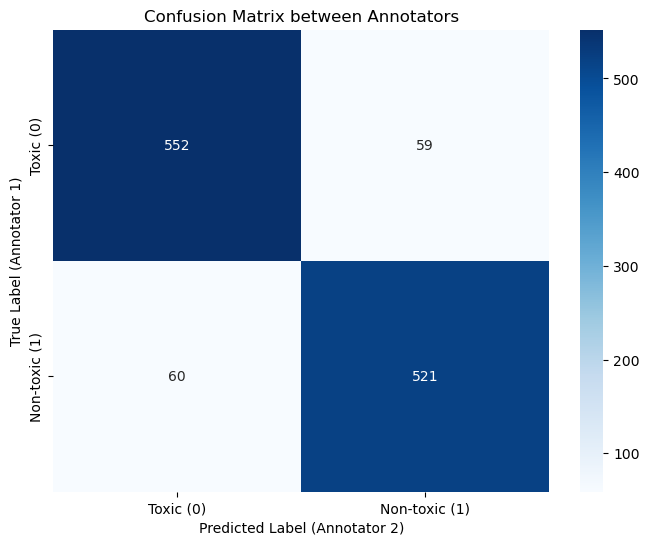

Total samples: 1192
Agreement: 1073 (90.02%)
Disagreement: 119 (9.98%)

Detailed Classification Report:
              precision    recall  f1-score   support

       Toxic       0.90      0.90      0.90       611
   Non-toxic       0.90      0.90      0.90       581

    accuracy                           0.90      1192
   macro avg       0.90      0.90      0.90      1192
weighted avg       0.90      0.90      0.90      1192



In [21]:
# Cell 6: Additional analysis - Confusion Matrix and detailed statistics
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(df_clean['label'], df_clean['label_2'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Toxic (0)', 'Non-toxic (1)'], 
            yticklabels=['Toxic (0)', 'Non-toxic (1)'])
plt.title('Confusion Matrix between Annotators')
plt.ylabel('True Label (Annotator 1)')
plt.xlabel('Predicted Label (Annotator 2)')
plt.show()

# Print agreement statistics
total = len(df_clean)
agreement = np.trace(cm)
disagreement = total - agreement
print(f"Total samples: {total}")
print(f"Agreement: {agreement} ({agreement/total:.2%})")
print(f"Disagreement: {disagreement} ({disagreement/total:.2%})")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(df_clean['label'], df_clean['label_2'], 
                           target_names=['Toxic', 'Non-toxic']))

In [22]:
# Cell 7: Sample some examples to verify the data
print("Sample sentences from the dataset:")
print("=" * 50)

# Sample some toxic sentences
toxic_samples = df_clean[df_clean['label'] == 0].sample(3, random_state=42)
print("\nToxic samples (label 0):")
for idx, row in toxic_samples.iterrows():
    print(f"- {row['sentence']}")

# Sample some non-toxic sentences  
non_toxic_samples = df_clean[df_clean['label'] == 1].sample(3, random_state=42)
print("\nNon-toxic samples (label 1):")
for idx, row in non_toxic_samples.iterrows():
    print(f"- {row['sentence']}")

Sample sentences from the dataset:

Toxic samples (label 0):
- Bangali hochhe copy master, Onner culture copy korte khuv expert, so for Dhantaras or Diwali absolutely North Indian culture!! 
- eto kichu holo hindu ra amder quran ta ke osomman korlo na r uni chi chi chi 😡😡
- Are dur ho chutmaranir put - Maluner durgondhomoy opobitro birjer jaroj shontan

Non-toxic samples (label 1):
- Wow! Chul pora komle r notun chul gajle tar cheye boro upokar ar ki
- Jab We Met ekta timeless movie, ja amader moner ekta corner e chirokal thakbe. 🥰🎥
- Bishonno sundor 💛👍


In [23]:
# Cell 8: Dataset statistics summary
print("Dataset Statistics Summary:")
print("=" * 30)
print(f"Total sentences: {len(df_clean)}")
print(f"Toxic sentences (0): {len(df_clean[df_clean['label'] == 0])} ({(len(df_clean[df_clean['label'] == 0])/len(df_clean))*100:.1f}%)")
print(f"Non-toxic sentences (1): {len(df_clean[df_clean['label'] == 1])} ({(len(df_clean[df_clean['label'] == 1])/len(df_clean))*100:.1f}%)")

# Check sentence length statistics
df_clean['sentence_length'] = df_clean['sentence'].str.len()
print(f"\nAverage sentence length: {df_clean['sentence_length'].mean():.1f} characters")
print(f"Shortest sentence: {df_clean['sentence_length'].min()} characters")
print(f"Longest sentence: {df_clean['sentence_length'].max()} characters")

Dataset Statistics Summary:
Total sentences: 1192
Toxic sentences (0): 611 (51.3%)
Non-toxic sentences (1): 581 (48.7%)

Average sentence length: 51.2 characters
Shortest sentence: 3 characters
Longest sentence: 358 characters
